In [ ]:
!pip install aed-utilities

  Created wheel for aed-utilities: filename=aed_utilities-0.5.2-cp37-none-any.whl size=4467 sha256=d09ab388df1b30cc242b5f5836f85d8c26e96fa9dd176fafbbd19049ca4b3b61
  Stored in directory: /root/.cache/pip/wheels/68/e6/33/33cadc26cc3b96e6f5830bb498d2c521b2e0fca7069fd52473
Successfully built aed-utilities


In [ ]:
#Kevin Alexis Iturra Carreño
import aed_utilities as aed
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self):
        self.izq.postorden()   
        self.der.postorden()
        print(self.info, end=" ")
    # Función auxiliar que se llama así misma pero usando los nodos del árbol
    def Auxiliar(self,x):
        # Si self.info es "+", entonces devuelva el string de aplicar la función auxiliar al nodo izquerdo más el string de aplicarlo al nodo derecho
        # No olvidemos ponerle paréntesis al comenzar y finalizar para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="+":
          return "("+str(self.izq.Auxiliar(x))+"+"+str(self.der.Auxiliar(x))+")"
        # Si self.info es "-", entonces devuelva el string de aplicar la función auxiliar al nodo izquerdo menos el string de aplicarlo al nodo derecho
        # No olvidemos ponerle paréntesis al comenzar y finalizar para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="-":
          return "("+str(self.izq.Auxiliar(x))+"-"+str(self.der.Auxiliar(x))+")"
        # Si self.info es "*", entonces devuelva el string de aplicar la función auxiliar al nodo izquerdo multiplicado el string de aplicarlo al nodo derecho
        # No olvidemos ponerle paréntesis al comenzar y finalizar para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="*":
          return "("+str(self.izq.Auxiliar(x))+"*"+str(self.der.Auxiliar(x))+")"
        # Si self.info es "/", entonces vea si la llamada de la función al nodo derecha es igual a 1, si lo es, 
        # entonces retorna la llamada al nodo izquierdo de la función
        # No olvidemos ponerle paréntesis al comenzar y finalizar para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="/":
          if self.der.Auxiliar(x)==1:
            return str(self.izq.Auxiliar(x))
          # Sino, devuelva el string de aplicar la función auxiliar al nodo izquerdo más el string de aplicarlo al nodo derecho
          else:
            return "("+str(self.izq.Auxiliar(x))+"/"+str(self.der.Auxiliar(x))+")"

    def derivada(self,x):
        # Si el nodo izquierdo y el derecho son vacío, retorna el string de la derivada del nodo info
        if self.izq==None and self.der==None:
          return str(self.info.derivada(x))
        # Si el nodo información es "+" retorna el string de aplicar la derivada al nodo izquierdo más el string de aplicar la derivada el nodo derecho
        # En otras palabras, sigue el principio de la derivada de la suma, (f+g)'=f'+g'
        # No olvidemos ponerle paréntesis al comenzar y finalizar para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="+":
            return "("+str(self.izq.derivada(x))+"+"+str(self.der.derivada(x))+")"
        # Si el nodo información es "-" retorna el string de aplicar la derivada al nodo izquierdo menos el string de aplicar la derivada el nodo derecho
        # En otras palabras, sigue el principio de la derivada de la resta, (f-g)'=f'-g'
        # No olvidemos ponerle paréntesis al comenzar y finalizar para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="-":
            return "("+str(self.izq.derivada(x))+"-"+str(self.der.derivada(x))+")"
        # Si el nodo información es "*",
        # retorna el string de aplicar la derivada al nodo izquierdo por el string de aplicar la función auxiliar al nodo derecho
        # más el string de aplicar la derivada al nodo derecho por el string de aplicar la función auxiliar al nodo izquierdo,
        # en otras palabras, sigue el principio de la derivada de la multiplicación, (f*g)'=f'*g + g'*f
        # No olvidemos ponerle paréntesis en todos los lugares necesarios para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="*":
          return "("+"("+str(self.izq.derivada(x))+"*"+str(self.der.Auxiliar(x))+")"+"+"+"("+str(self.der.derivada(x))+"*"+str(self.izq.Auxiliar(x))+")"+")"
        # Si el nodo información es "/",
        # retorna el string de aplicar la derivada al nodo izquierdo por el string de aplicar la función auxiliar al nodo derecho
        # menos el string de aplicar la derivada al nodo derecho por el string de aplicar la función auxiliar al nodo izquierdo
        # dividido por el string de aplicar la función auxiliar al nodo derecho por el string de aplicar la función auxiliar al nodo derecho
        # en otras palabras, sigue el principio de la derivada de la división, (f/g)'=(f'*g - g'*f)/g^2
        # No olvidemos ponerle paréntesis en todos los lugares necesarios para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="/":
          return "("+"("+"("+str(self.izq.derivada(x))+"*"+str(self.der.Auxiliar(x))+")"+"-"+"("+str(self.der.derivada(x))+"*"+str(self.izq.Auxiliar(x))+")"+")"+"/"+"("+str(self.der.Auxiliar(x))+"*"+str(self.der.Auxiliar(x))+")"+")"
        # Si el nodo información es "^",
        # retorna el string de aplicar la función auxiliar al nodo izquierdo elevarlo al string de aplicar la función auxiliar al nodo derecho
        # menos el string 1 y todo lo anterior por el string de aplicar la función auxiliar al nodo derecho 
        #por el string de aplicar la derivada al nodo izquierdo,
        # en otras palabras, sigue la regla de la cadena para funciones del tipo x^algo, (f^numero)'=numero*f^(numero-1)*f'
        # No olvidemos ponerle paréntesis en todos los lugares necesarios para evitar problemas cuando dibuje nuestro árbol de expresiones :)
        if self.info=="^":
          return "("+"("+str(self.der.Auxiliar(x))+"*"+str(self.izq.Auxiliar(x))+")"+"^"+"("+str(self.der.Auxiliar(x))+"-"+str(1)+")"+"*"+str(self.izq.derivada(x))+")"

class Nodoe:
    def __init__(self, info):
        self.info=info
    def postorden(self):
        print(self.info, end=" ")
    # También definimos la función auxiliar en el nodoe pero es más sencilla ya que por tratarse de las hojas del árbol solo debe devolver self.info
    def Auxiliar(self,x):
        return self.info
    def derivada(self,x):
        # La simplicidad se debe al mismo argumenta, al estar en las hojas solo debemos verificar si la función es igual a la variable o no
        # Cuando la hoja es igual a la variable retorna 1
        if self.info==x:
          return str(1)
        # Cuando es diferente a la variable retorna 0
        else:
          return str(0)

class Arbol:
    def __init__(self,formula):
        if type(formula)!=str: # se supone que viene el árbol ya construído
          self.raiz=formula
          return
        # la fórmula viene en forma de string
        global k
        global s
        s=formula+";" # agregamos una marca de fin de la entrada
        k=0 # indica próximo caracter por procesar
        # definimos funciones para analizar la fórmula
        def expresion(): # retorna puntero a la raíz de un árbol que representa a la fórmula s
            global k
            global s
            a=factor()
            while s[k]=="+" or s[k]=="-":
                op=s[k]
                k+=1
                b=factor()
                a=Nodoi(a,op,b)
            return a
        def factor():
            global k
            global s
            a=termino()
            while s[k]=="*" or s[k]=="/":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def termino():
            global k
            global s
            a=primario()
            if s[k]=="^":
                op=s[k]
                k+=1
                b=termino()
                a=Nodoi(a,op,b)
            return a
        def primario(): # posible constante, variable o formula parentizada
            global k
            global s
            if s[k].isalpha() or s[k].isdigit():
                a=Nodoe(s[k])
                k+=1
                return a
            if s[k]=="(": # fórmula parentizada
                k+=1
                a=expresion()
                if s[k]!=")":
                    print("Error: Falta cierra paréntesis: "+formula[k:])
                    assert False
                k+=1
                return a
            print("Error: Falta variable, número o abre paréntesis: "+formula[k:])
            assert False
              
        a=expresion()
        if s[k]!=";":
            print("Error: Basura al final de la fórmula: "+formula[k:])
            assert False                
        self.raiz=a
    
    #El str lo transforma a arbol
    def derivada(self,x):
        return Arbol(self.raiz.derivada(x))
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der",classNone=Nodoe )
      btd.draw_tree(self, "raiz")

#Para la función simplificar basta ccrear una función que reciba como parámetro el árbol derivado,
# Si la raíz es "+", "-", "*" o "/" entonces retorna el árbol
# Sino, creamos dos variables una que llame a la función simplificar para el nodo izq y otra para el derecho(recursividad)
# Si self.info del nodo izquierdo es 0, vea si la raíz es "+" o "-", si lo es, que retorne la simplificación del nodo izquierdo, 
# si es "*" o "/" que retorne la simplificación del nodo derecho
# Hacer lo anterior análogamente con self.info del nodo derecho,
# Si self.info de la simplificación del nodo izquierdo es 1 y la raíz del árbol es "*", entonces retorna la simplificación del nodo derecho,
# Si self.info de la simplificación del nodo derecho es 1 y, la raíz del árbol es "*" o "/", retorna la simplificación del nodo izquierdo.
# Sino, retorna un nuevo árbol con las simplificaciones.

In [ ]:
def probar_derivada(formula,x):
    f=Arbol(formula)
    print("Fórmula original:")
    f.dibujar()
    print(f.derivada(x))
    g=f.derivada(x)
    print("Derivada respecto de "+x+":")
    g.dibujar()

Fórmula original:


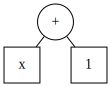

Derivada respecto de x:


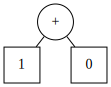

In [ ]:
probar_derivada("x+1","x")

Fórmula original:


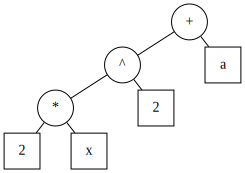

Derivada respecto de x:


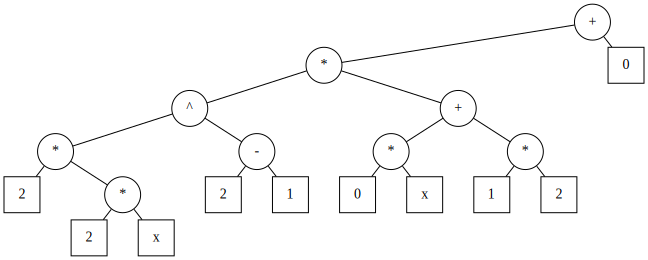

In [ ]:
probar_derivada("(2*x)^2+a","x")

Fórmula original:


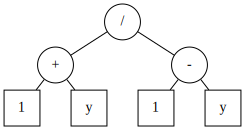

Derivada respecto de y:


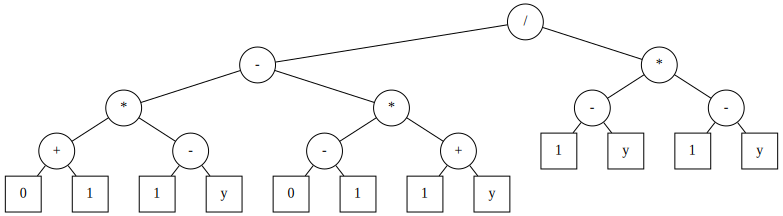

In [ ]:
probar_derivada("(1+y)/(1-y)","y")